* Bu data da verilerimiz imbalanced yani oldukça dengesiz, bu demek oluyor ki bazı sınıfların verisi diğerinden az, makine öğrenmesinde bu istenmeyen bir durum,  bunu için SMOTE yöntemi kullanacağız yani (Synthetic Minority Over-sampling Technique), az olan sınıflar için sentetik dataüretip veri dengesizliğini aşacağız. over sampling veya undersampling.  Veriyi dengeledikten sonra model geliştirme ve diğer işlemleri yapabiliriz, bunun için from imblearn.over_sampling import SMOTE paketini kullanacağız.

In [6]:
#!pip install imbalanced-learn

In [7]:
#!pip install scikit-learn

In [8]:
import pandas as pd
pd.set_option('display.max_columns',55)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

* Bu, bir cihaz veya sistem arıza verilerini içeren bir veri seti. 

* Veriler aşağıdaki özelliklerden oluşuyor:

*date: Cihaz arızasının gerçekleştiği tarih.
    
*device: Arızalanan cihazın kimliği.

*failure: Arıza durumu (0 = arıza yok, 1 = arıza var).

*attribute1 - attribute9: Cihazın çeşitli performans ölçümleri.

In [11]:
df=pd.read_csv('failure.csv')

In [12]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [13]:
df.shape

(124494, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [15]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

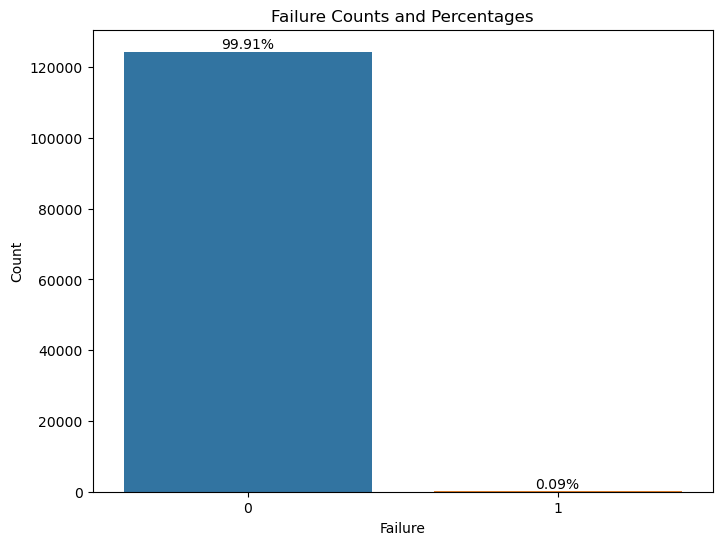

In [16]:
plt.figure(figsize=(8, 6))
value_counts = df['failure'].value_counts()
value_percentages = (value_counts / len(df)) * 100
sns.countplot(x=df['failure'])
# Her bir kategorinin yüzde oranını gösterme
for i, p in enumerate(value_percentages):
    plt.text(i, value_counts[i], f"{p:.2f}%", ha='center', va='bottom')
plt.title('Failure Counts and Percentages')
plt.xlabel('Failure')
plt.ylabel('Count')
plt.show()

In [17]:
# Datanın dengesizliğini burada görebiliriz

In [19]:
df['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [20]:
del df['date']

In [21]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [22]:
df['device'] = df['device'].str.replace(r'[a-zA-Z]', '', regex=True).astype(str)
# device sutunundaki harflei kaldırdım

In [23]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,101085,0,215630672,56,0,52,6,407438,0,0,7
1,10166,0,61370680,0,3,0,6,403174,0,0,0
2,1016,0,173295968,0,0,0,12,237394,0,0,0
3,1010,0,79694024,0,0,0,6,410186,0,0,0
4,1012,0,135970480,0,0,0,15,313173,0,0,3


In [24]:
del df['device']

In [25]:
df.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,0,215630672,56,0,52,6,407438,0,0,7
1,0,61370680,0,3,0,6,403174,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,0
4,0,135970480,0,0,0,15,313173,0,0,3


* Imbalanced datada balance yapmadan önce de modelleme yapılır, daha sonra balance yapılıp tekrar modellenir ve kıyaslama yapılır.

In [26]:
x=df.drop('failure',axis=1)
y=df['failure']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [28]:
G=GaussianNB()
B=BernoulliNB()

In [29]:
G.fit(x_train,y_train)

GaussianNB()

In [30]:
Gtahmin=G.predict(x_test)

In [31]:
accuracy_score(Gtahmin,y_test)

0.997911562713362

In [32]:
B.fit(x_train,y_train)

BernoulliNB()

In [33]:
Btahmin=B.predict(x_test)

In [34]:
accuracy_score(Btahmin,y_test)

0.9939756616731595

In [35]:
d=DecisionTreeClassifier()

In [36]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
dtahmin=d.predict(x_test)

In [38]:
accuracy_score(dtahmin,y_test)

0.9987148078236073

# OVERSAMPLING & UNDERSAMPLING

<img src='https://miro.medium.com/v2/resize:fit:725/1*7xf9e1EaoK5n05izIFBouA.png'>

In [39]:
from collections import Counter
over = SMOTE()
x, y = over.fit_resample(x, y)
labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0: 124388, 1: 124388})


<Axes: xlabel='failure', ylabel='count'>

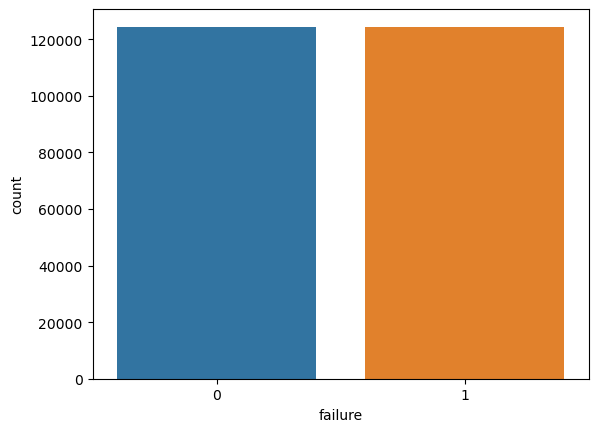

In [40]:
sns.countplot(x=y)
# artık y dengelendi.

In [41]:
df_resampled = pd.DataFrame(x, columns=x.columns)
df_resampled['failure'] = y

In [42]:
# balanced verinin birkaç satırını görelim
df_resampled.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,215630672,56,0,52,6,407438,0,0,7,0
1,61370680,0,3,0,6,403174,0,0,0,0
2,173295968,0,0,0,12,237394,0,0,0,0
3,79694024,0,0,0,6,410186,0,0,0,0
4,135970480,0,0,0,15,313173,0,0,3,0


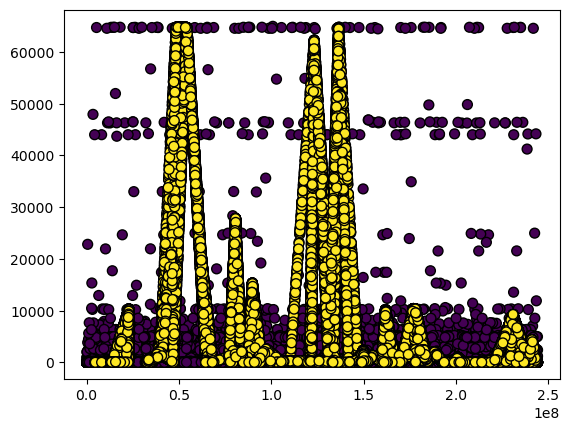

In [44]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], marker="o", c=y, s=50, edgecolor="k")

## Modelleme

In [45]:
x=df_resampled.drop('failure',axis=1)
y=df_resampled[['failure']]

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [47]:
G=GaussianNB()
B=BernoulliNB()

In [48]:
G.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [49]:
Gtahmin=G.predict(x_test)

In [50]:
accuracy_score(Gtahmin,y_test)

0.5791663316986896

In [51]:
d=DecisionTreeClassifier()

In [52]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
dtahmin=d.predict(x_test)

In [54]:
accuracy_score(dtahmin,y_test)

0.9973470536216738

In [55]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24706
           1       1.00      1.00      1.00     25050

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756



In [56]:
confusion_matrix(dtahmin,y_test)

array([[24663,    43],
       [   89, 24961]], dtype=int64)

<Axes: >

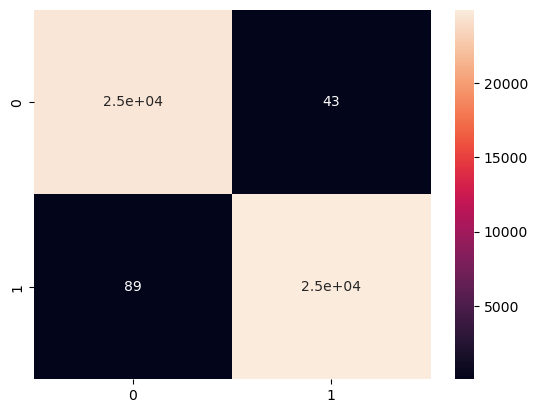

In [57]:
sns.heatmap(confusion_matrix(dtahmin,y_test),annot=True)

* model örneklerin %99 unu doğru tahmin etti ve başarılı oldu, data imbalanced iken yaptığım modellemede her iki model de yüksek başarı göstermişti smote den sonra DT yüksek başarı gösterdi, GB %55 te kaldı.

* device sutunu sonuca etki etmediğni düşündüğümüz için en başta sildik. Ama ürünleri liste üzerinden  aramak istediğimiz zaman bu device değerleri lazım olacak. o yüzden hiç silmemek en mantıklı yol olur.  